In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [67]:
data_psy_complet = pd.read_excel('data-for-publication.xlsx', sheet_name='Dataset')
data_psy_information = pd.read_excel('data-for-publication.xlsx', sheet_name='Information')

In [68]:

print(data_psy_complet.columns)

Index(['dog.id', 'breed_group', 'sex', 'sterilization_status',
       'Noise.sensitivity_age', 'Fearfulness_age', 'Aggression_age',
       'Surface_age', 'Separation_age', 'Impulsivity_age',
       ...
       'Vas_8_excessive', 'Vas_9_alwaysplay', 'Vas_10_complicatedtasks',
       'Vas_11_reacthastily', 'Vas_12_easilydistracted', 'Vas_13_cannotwait',
       'impulsive', 'impulsiveness_disturbes', 'inattention_score',
       'impulsivity_score'],
      dtype='object', length=250)


In [69]:

sterilized = data_psy_complet.query("sterilization_status == 'sterilized'")
not_sterilized = data_psy_complet.query("sterilization_status == 'intact'")
print('Impulsion of sterilized dogs')
print(sterilized['impulsive'].mean())
print(sterilized['Impulsivity_age'].mean())
print('Impulsion of intact dogs')
print(not_sterilized['impulsive'].mean())
print(not_sterilized['Impulsivity_age'].mean())
print()
print('Dominance of sterilized dogs')
print(sterilized['Dominant'].mean())
print('Dominance of intact dogs')
print(not_sterilized['Dominant'].mean())
print()
print('Patience of sterilized dogs')
print(sterilized['Patient'].mean())
print('Patience of intact dogs')
print(not_sterilized['Patient'].mean())
print()
print('Patience of sterilized dogs')
print(sterilized['Patient'].mean())
print('Patience of intact dogs')
print(not_sterilized['Patient'].mean())
print(not_sterilized['Patient'].mean())


Impulsion of sterilized dogs
0.21521562245728235
7.38575131120885
Impulsion of intact dogs
0.1970991970991971
4.525206507153724

Dominance of sterilized dogs
2.532295462073534
Dominance of intact dogs
2.267448979591837

Patience of sterilized dogs
3.2327500825354902
Patience of intact dogs
3.2975257102128093

Patience of sterilized dogs
3.2327500825354902
Patience of intact dogs
3.2975257102128093
3.2975257102128093


In [70]:
max = 0
atribut = ''
nove_data_psy = data_psy_complet.drop('dog.id', axis=1)
nove_data_psy.drop('Separation_age', axis=1, inplace=True)
numeric_cols = nove_data_psy.select_dtypes(include='number').columns
for i in numeric_cols:

    x = not_sterilized[str(i)].mean()
    y = sterilized[str(i)].mean()
    if abs(x - y) > max:
        max = abs(x - y)
        atribut = i


In [71]:
print(atribut)
print(max)

Noise.sensitivity_age
2.877174418998094


In [72]:
data_psy_breeder = data_psy_complet.query("obtained_from == 'breeder'")
data_psy_not_breeder = data_psy_complet.query("obtained_from != 'breeder'")
print(data_psy_complet['Impulsivity_age'].mean())
old_dogs = data_psy_complet.query("Impulsivity_age > 5.21")
print(old_dogs["impulsive"].mean())
young_dogs = data_psy_complet.query("Impulsivity_age < 5.21")
print(young_dogs["impulsive"].mean())

print('====================')
print('form breeder')
print('====================')

print(data_psy_breeder['Impulsivity_age'].mean())
old_dogs_breeder = data_psy_breeder.query("Impulsivity_age > 5.21")
print(old_dogs_breeder["impulsive"].mean())
young_dogs_breeder = data_psy_breeder.query("Impulsivity_age < 5.21")
print(young_dogs_breeder["impulsive"].mean())

print('====================')
print('not form breeder')
print('====================')

print(data_psy_not_breeder['Impulsivity_age'].mean())
old_dogs_not_breeder = data_psy_not_breeder.query("Impulsivity_age > 5.21")
print(old_dogs_not_breeder["impulsive"].mean())
young_dogs_not_breeder = data_psy_not_breeder.query("Impulsivity_age < 5.21")
print(young_dogs_not_breeder["impulsive"].mean())


5.210481631792988
0.15717740162673116
0.23725803587284675
form breeder
5.100211060204247
0.1539292465568458
0.23687474162877223
not form breeder
5.774309670945424
0.17139479905437352
0.23959646910466584


Working with information dataset to extract values rated on the scale of 1 to 5

In [73]:
data_psy_information['SECTION'] = data_psy_information['SECTION'].fillna(method='ffill')
target_text = """1 = Never
2 = Rarely
3 = Sometimes
4 = Often
5 = Always or almost always"""
info_rated = data_psy_information[data_psy_information['COLUMN VALUES'] == target_text]
print(info_rated.head())

               SECTION      COLUMN NAME  \
113  Noise sensitivity   Thunder_escape   
114  Noise sensitivity     Thunder_pant   
115  Noise sensitivity     Thunder_hide   
116  Noise sensitivity  Thunder_tremble   
117  Noise sensitivity     Thunder_pace   

                   COLUMN DESCRIPTION/ SURVEY QUESTION  \
113             When hearing thunder... My dog escapes   
114                When hearing thunder… My dog pants    
115  When hearing thunder… My dog hides (e.g. under...   
116             When hearing thunder… My dog trembles    
117                When hearing thunder… My dog paces    

                                         COLUMN VALUES  
113  1 = Never\n2 = Rarely\n3 = Sometimes\n4 = Ofte...  
114  1 = Never\n2 = Rarely\n3 = Sometimes\n4 = Ofte...  
115  1 = Never\n2 = Rarely\n3 = Sometimes\n4 = Ofte...  
116  1 = Never\n2 = Rarely\n3 = Sometimes\n4 = Ofte...  
117  1 = Never\n2 = Rarely\n3 = Sometimes\n4 = Ofte...  


C:\Users\micha\AppData\Local\Temp\ipykernel_17860\3092914543.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_psy_information['SECTION'] = data_psy_information['SECTION'].fillna(method='ffill')


In [74]:
max = 0
max_sterilized = 0
max_intact = 0
max_column = ''
ranked_data = pd.DataFrame([{
    'Attribute': [],
    'Absolute difference': [],
    'Sterilized mean': [],
    'Intact mean': [],
    'Bigger value is': []
}])

for i in info_rated['COLUMN NAME']:
    ster = sterilized[i].mean()
    not_ster = not_sterilized[i].mean()
    if ster > not_ster:
        bigger_value = 'sterilized'
    else:
        bigger_value = 'intact'
    ranked_data.loc[len(ranked_data)] = [i, abs(ster - not_ster), ster, not_ster, bigger_value]
    if abs(ster - not_ster) > max:
        max = abs(ster - not_ster)
        max_sterilized = ster
        max_intact = not_ster
        max_column = i

print('Column:', max_column)
print('absolute difference:', max)
print('sterilized rating:', max_sterilized)
print('intact rating:', max_intact)
ranked_data = ranked_data.drop(index=0)


Column: Dog_enthusiastic
absolute difference: 0.42428438785846767
sterilized rating: 3.5691171297924726
intact rating: 3.9934015176509403


Sort values by biggest to smallest

In [75]:
ranked_data = ranked_data.sort_values(by='Absolute difference', ascending=False)
print(ranked_data.head())

           Attribute Absolute difference Sterilized mean Intact mean  \
54  Dog_enthusiastic            0.424284        3.569117    3.993402   
26   Firework_notice            0.377436        3.561546    3.938983   
19  Firework_taillow            0.376359        1.973093    1.596734   
38      Other_notice            0.334141        3.357991    3.692132   
15     Firework_pant            0.329754        1.823529    1.493775   

   Bigger value is  
54          intact  
26          intact  
19      sterilized  
38          intact  
15      sterilized  


Make different tables for sterilized and intact

In [76]:
ranked_sterilized = ranked_data[ranked_data['Bigger value is'] == 'sterilized']
ranked_intact = ranked_data[ranked_data['Bigger value is'] == 'intact']

Text(0.5, 0, '')

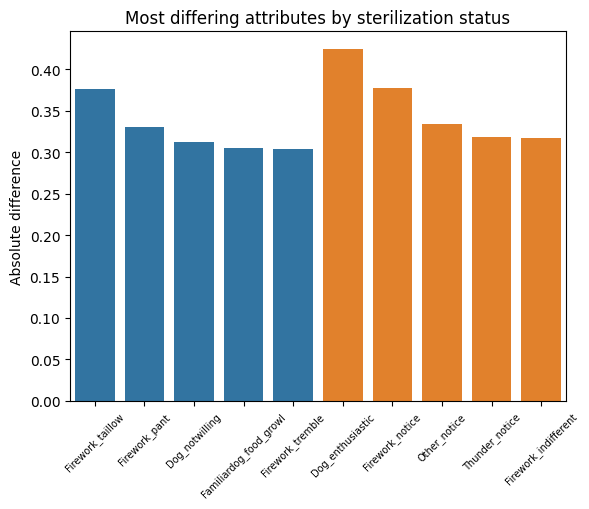

In [80]:
sterilized_barplot = sns.barplot(data = ranked_sterilized[:5], x='Attribute', y='Absolute difference')
plt.xticks(rotation=45, fontsize=7)
intact_barplot = sns.barplot(data = ranked_intact[:5], x='Attribute', y='Absolute difference')
plt.title("Most differing attributes by sterilization status")
plt.xlabel("")